In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pathlib import Path
from read_roi import read_roi_zip
from collections import OrderedDict, Counter
import math
import PIL
from PIL import Image
from PIL.TiffTags import TAGS
import tkinter as tk
from tkinter import filedialog
import seaborn as sns
from pandas.api.types import CategoricalDtype
import itertools
from colour import Color
from datetime import date

In [2]:
today = date.today()
print("Today's date:", today)
date_today = str(today)
date_today

Today's date: 2021-12-01


'2021-12-01'

In [3]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)
path

WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor')

In [4]:
parents = [x for x in path.iterdir() if x.is_dir()]
parents


[WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-15_dualcolor_lowbindigtips'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-17_dualcolor_wt_r303x'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-18_dualcolor_freshtaxol'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-22_dualcolor_freshtaxol'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-25_dualcolor_freshtaxol'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-29_dualcolor_freshtaxol'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-30_dualcolor_freshtaxol'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/mt-area')]

In [5]:
folders = []
for j in parents:
    folders0 = [x for x in j.iterdir() if x.is_dir()]
    folders0 = [i for i in folders0 if (str(i)[-3:] == 'yes') == True]
    folders =  folders + folders0

folders

[WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-17_dualcolor_wt_r303x/CH3_DCXGFP0.5nM_typeWT_DCXRFP9.5nM_freshtaxol-yes'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-18_dualcolor_freshtaxol/CH1_DCXGFP0.5nM_typeR303X_DCXRFP9.5nM-yes'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-18_dualcolor_freshtaxol/CH2_DCXGFP0.5nM_typeR303X_DCXRFP8.5nM-yes'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-18_dualcolor_freshtaxol/CH4_DCXGFP0.5nM_typeWT_DCXRFP8.5nM-yes'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-22_dualcolor_freshtaxol/CH4_DCXGFP0.5nM_typeWT_DCXRFP6.5nM-yes'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-22_dualcolor_freshtaxol/CH5_DCXGFP0.5nM_typeR303X_DCXRFP6.5nM-yes'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-25_dualcolor_freshtaxol/CH1_DCXGFP0.5nM_typeWT_DCXRFP4.5nM-yes'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-25_dualcolor_freshtaxol/CH2_DCXGFP0.5nM_typeR303

In [6]:
files = []
for j in range(0,len(folders)):  
    resultfolder = folders[j]/'results'
    files0 = [x for x in resultfolder.iterdir() if x.is_file()]
    files0 = [i for i in files0 if str(i).rfind('Results') != -1]
    files = files + files0
files 

[WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-17_dualcolor_wt_r303x/CH3_DCXGFP0.5nM_typeWT_DCXRFP9.5nM_freshtaxol-yes/results/2_Results.csv'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-17_dualcolor_wt_r303x/CH3_DCXGFP0.5nM_typeWT_DCXRFP9.5nM_freshtaxol-yes/results/3_Results.csv'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-17_dualcolor_wt_r303x/CH3_DCXGFP0.5nM_typeWT_DCXRFP9.5nM_freshtaxol-yes/results/4_Results.csv'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-17_dualcolor_wt_r303x/CH3_DCXGFP0.5nM_typeWT_DCXRFP9.5nM_freshtaxol-yes/results/5_Results.csv'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-17_dualcolor_wt_r303x/CH3_DCXGFP0.5nM_typeWT_DCXRFP9.5nM_freshtaxol-yes/results/6_Results.csv'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-18_dualcolor_freshtaxol/CH1_DCXGFP0.5nM_typeR303X_DCXRFP9.5nM-yes/results/1_Results.csv'),
 WindowsPath('C:/Users/sofia/Dropbox/DCX/DualColor/2021-11-18_dualcolo

In [7]:
ch = []
conc_DCXRFP = []
conc_DCXGFP = []
DCX_type = []
dates = []

for i in files:
    CHloc = str(i).find('CH')
    DCXRFPloc = str(i).rfind('RFP')
    DCXGFPloc = str(i).rfind('GFP')
    dcxtype = str(i).find('type')
    ch = ch + [str(i)[CHloc+2:CHloc+3]]
    conc_DCXRFP = conc_DCXRFP + [(str(i)[DCXRFPloc+3:DCXRFPloc+6])]
    conc_DCXGFP = conc_DCXGFP + [(str(i)[DCXGFPloc+3:DCXGFPloc+6])]
    DCX_type = DCX_type + [(str(i)[dcxtype+4:DCXRFPloc-4])]
    
    dateloc = str(i).find("202")
    dates = dates + [str(i)[dateloc : dateloc+10]]

    conc_DCXGFP =  [float(i) for i in conc_DCXGFP]
    conc_DCXRFP =  [float(i) for i in conc_DCXRFP]
    

In [8]:
dcxgfp_conc = '[GFP-DCX](nM)'
dcxrfp_conc = '[RFP-DCX](nM)'
corr_gfp = 'GFPxRFP Correlation %'
area_rfp = 'RFP Area %'
Type = 'Type'

In [9]:
metadf = pd.DataFrame({'Date': dates,'CH': ch,'Type': DCX_type,
                   dcxgfp_conc: conc_DCXGFP,
                   dcxrfp_conc: conc_DCXRFP})


In [10]:
df = pd.DataFrame(columns=['GFP','RFP','Cy5','GFPxRFP'])
for i in files:
    resultcsv = pd.read_csv(i, encoding='utf-8')
    arr = resultcsv['Mean'].values
    df = df.append(pd.DataFrame(arr.reshape(1,-1), columns=list(df)), ignore_index=True)



In [11]:
result = pd.concat([metadf, df], axis=1)

In [12]:
result[corr_gfp] = df['GFPxRFP'] / df['GFP'] * 100
result[area_rfp] = df['RFP'] / df['Cy5'] * 100


In [13]:
Type_order = ['WT','R303X']
category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants
result[Type] = result[Type].astype(category_Type)
result = result.sort_values(by=[Type, dcxrfp_conc])


In [14]:
result.to_csv(path/('correlation-analysis_'+date_today +'.csv'), encoding='utf-8', index=False)
result

,Date,CH,Type,[GFP-DCX](nM),[RFP-DCX](nM),GFP,RFP,Cy5,GFPxRFP,GFPxRFP Correlation %,RFP Area %
32,2021-11-25,3,WT,0.5,2.5,1.053,1.488,5.803,0.747,70.940171,25.641909
33,2021-11-25,3,WT,0.5,2.5,1.452,1.694,4.873,1.070,73.691460,34.762980
34,2021-11-25,3,WT,0.5,2.5,2.090,2.809,8.116,1.628,77.894737,34.610646
26,2021-11-25,1,WT,0.5,4.5,3.063,3.598,6.250,2.415,78.844270,57.568000
27,2021-11-25,1,WT,0.5,4.5,4.154,4.708,9.407,3.357,80.813674,50.047837
28,2021-11-25,1,WT,0.5,4.5,3.277,3.981,9.104,2.552,77.876106,43.728032
20,2021-11-22,4,WT,0.5,6.5,3.684,4.892,9.832,2.691,73.045603,49.755899
21,2021-11-22,4,WT,0.5,6.5,3.253,4.702,9.679,2.461,75.653243,48.579399
22,2021-11-22,4,WT,0.5,6.5,1.718,3.008,7.829,1.294,75.320140,38.421254
15,2021-11-18,4,WT,0.5,8.5,2.570,4.526,12.371,1.821,70.856031,36.585563


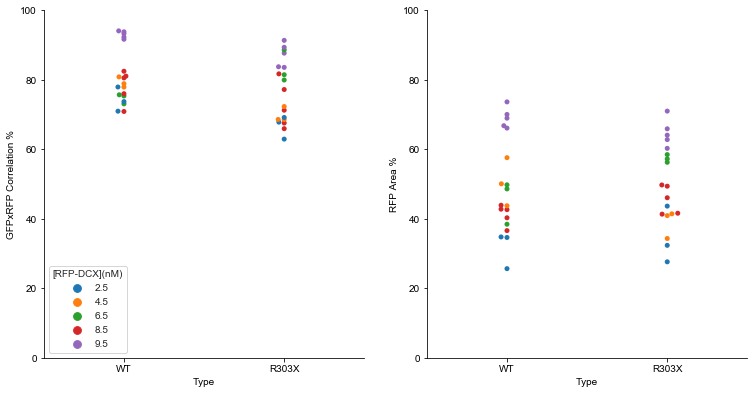

In [15]:
fig, axes = plt.subplots(1,2,figsize=(11,6))
sns.set_style("ticks")

corr = sns.swarmplot(ax=axes[0],x=Type, y=corr_gfp, hue=dcxrfp_conc, data=result)
area = sns.swarmplot(ax=axes[1],x=Type, y=area_rfp, hue=dcxrfp_conc, data=result)

corr.set(ylim=(0, 100))
area.set(ylim=(0, 100))

area.legend([],[], frameon=False)

sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()

#plt.savefig(path/('correlation_area_'+date_today+'.pdf'))

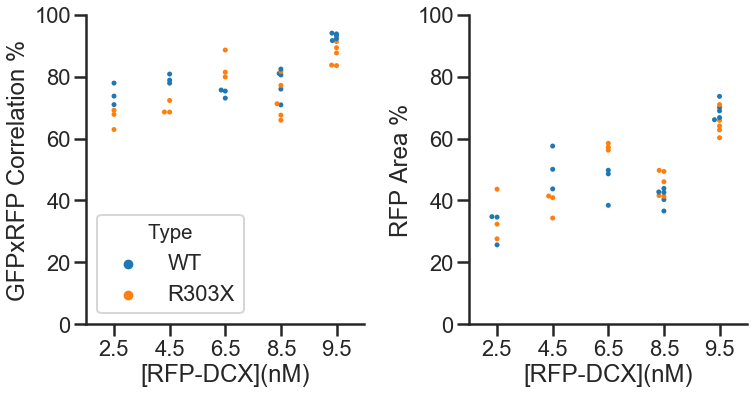

In [16]:
fig, axes = plt.subplots(1,2,figsize=(11,6))
sns.set_style("ticks")

corr = sns.swarmplot(ax=axes[0],x=dcxrfp_conc, y=corr_gfp, hue=Type, data=result)
area = sns.swarmplot(ax=axes[1],x=dcxrfp_conc, y=area_rfp, hue=Type, data=result)

corr.set(ylim=(0, 100))
area.set(ylim=(0, 100))

area.legend([],[], frameon=False)

sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()

#plt.savefig(path/('correlation_area_hueType'+date_today+'.pdf'))

In [17]:
dcxgfp_conc = '[GFP-DCX](nM)'
dcxrfp_conc = '[RFP-DCX](nM)'
corr_gfp = 'GFPxRFP Correlation %'
area_rfp = 'RFP Area %'
Type = 'Type'

In [40]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
palette = [cyan,green]

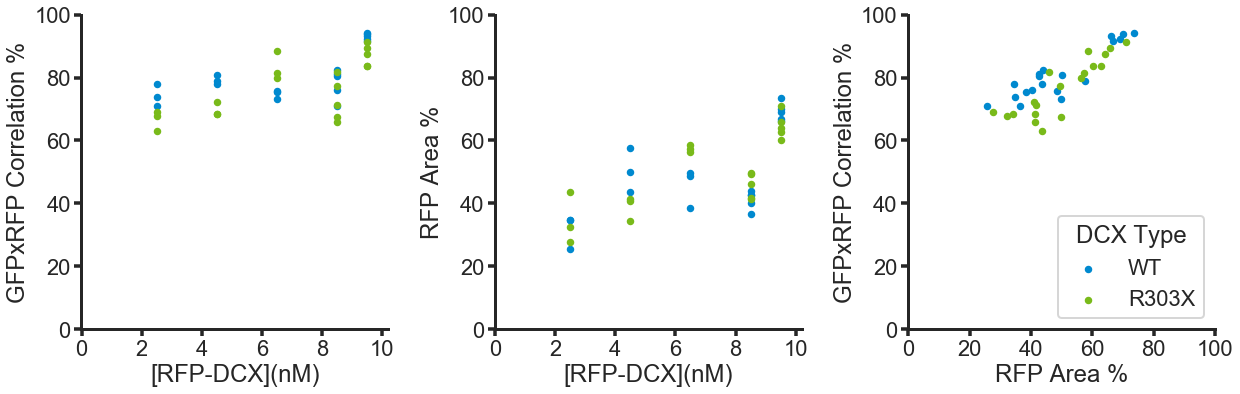

In [74]:
xparameters = [dcxrfp_conc,dcxrfp_conc,area_rfp]
yparameters = [corr_gfp,area_rfp,corr_gfp]

scattersize = 30
cap = 5

fig, ax = plt.subplots(1,3,figsize=(17.75,6))

for i in np.arange(len(ax)):
    count = 0
    for dcxtype in result[Type].unique(): 
        
        x = result[(result[Type]== dcxtype)][xparameters[i]]
        y = result[(result[Type]== dcxtype)][yparameters[i]]

        ax[i].scatter(x , y, s= scattersize,color=palette[count])
        
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['left'].set_lw(3)
        ax[i].spines['bottom'].set_lw(3)
        ax[i].tick_params(axis='both', width = 3.5, length = 7)
        ax[i].set_ylim(-0.015,100)
        ax[i].set_ylabel(yparameters[i])
        ax[i].set_xlabel(xparameters[i]) 
    
        count += 1

ax[0].set_xlim(-0.015,10.2)
ax[0].xaxis.set_ticks(np.arange(0, 10.2, 2))

ax[1].set_xlim(-0.015,10.2)
ax[1].xaxis.set_ticks(np.arange(0, 10.2, 2))

ax[2].set_xlim(-0.015,100)
ax[2].xaxis.set_ticks(np.arange(0, 101, 20))
ax[2].legend((Type_order),loc='lower right',title='DCX Type')

plt.tight_layout()
plt.savefig(path/('correlation_area_hueType'+date_today+'.pdf'))